# Loading of the target

## Figure 10 from thermal analysis paper

- Path to original figure script: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_10_loading_new_target/Figure_10_loading_new_target.py

- Path to the datafile: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_10_loading_new_target/df.csv

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import glob
import re
import copy

In [2]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [3]:
# datafile from COMSOL
path_to_data = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_10_loading_new_target/'
output_folder = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/loading_of_fresh_target/'

In [4]:
df = pd.read_csv(f'{path_to_data}/df.csv', index_col=0)
df.head()

,HV_voltage,HV_current,beam_power,beam_power_leakage_current,dose_corr,time.1,time_min,output,output_theoretical_per_mA,output_theoretical,output_theoretical_leakage_current,output_fraction,output_fraction_leakage_current
time,,,,,,,,,,,,,
2017-11-29 11:40:00,19.204667,0.783333,15.043656,13.123189,-13.598928,2017-11-29 11:40:00,0.0,-2.017022e+05,4.739872e+05,3.712900e+05,3.238913e+05,-0.543247,-0.622747
2017-11-29 11:41:00,39.485517,1.328448,52.454467,48.505916,98.647524,2017-11-29 11:41:00,1.0,1.463161e+06,1.134242e+07,1.506782e+07,1.393358e+07,0.097105,0.105010
2017-11-29 11:42:00,40.077500,1.339167,53.670452,49.662702,133.520262,2017-11-29 11:42:00,2.0,1.980401e+06,1.198142e+07,1.604511e+07,1.484697e+07,0.123427,0.133388
2017-11-29 11:43:00,40.070000,1.322712,53.001064,48.994064,134.272921,2017-11-29 11:43:00,3.0,1.991565e+06,1.197319e+07,1.583708e+07,1.463976e+07,0.125753,0.136038
2017-11-29 11:44:00,40.072500,1.320000,52.895700,48.888450,134.103158,2017-11-29 11:44:00,4.0,1.989047e+06,1.197593e+07,1.580823e+07,1.461064e+07,0.125824,0.136137


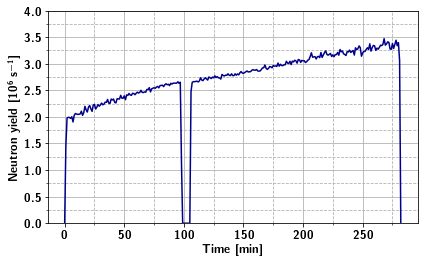

In [6]:
ls = 12
fs = 12

fig = plt.figure(figsize=(8*0.75,5*0.75))

# axis 1
ax1 = fig.add_subplot(1, 1, 1)

# set negative values to zero
df['output'] = df['output'].clip(lower=0)
# add zero at the end
X = df['time_min'].values
X = np.append(X, np.max(X)+1.0)
Y = df['output'].values / 1e6
Y = np.append(Y, 0.0)
ax1.plot(X, Y, '-',color="darkblue", linewidth=1.5)
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

ax1.tick_params('x', colors='black', labelsize=ls)  
ax1.tick_params('y', colors='black', labelsize=ls)  

ax1.set_ylabel(r'\textbf{Neutron yield [$10^{6}$ s$^{-1}$]}', fontsize=fs)
ax1.set_xlabel(r'\textbf{Time [min]}', fontsize=fs, labelpad=2)

ax1.grid(b=True, which='major', linestyle='-')#, color='gray')
ax1.grid(b=True, which='minor', linestyle='--')#, color='gray')
plt.ylim(0,4)
# plt.legend(loc="best")
# fig.subplots_adjust(left=0.15, right=0.97, top=0.88, bottom=0.18)
plt.tight_layout()
plt.savefig(f'{output_folder}loading_of_fresh_target.pdf', dpi=600)

plt.show()